### Figure 2 : Ripple oscillations

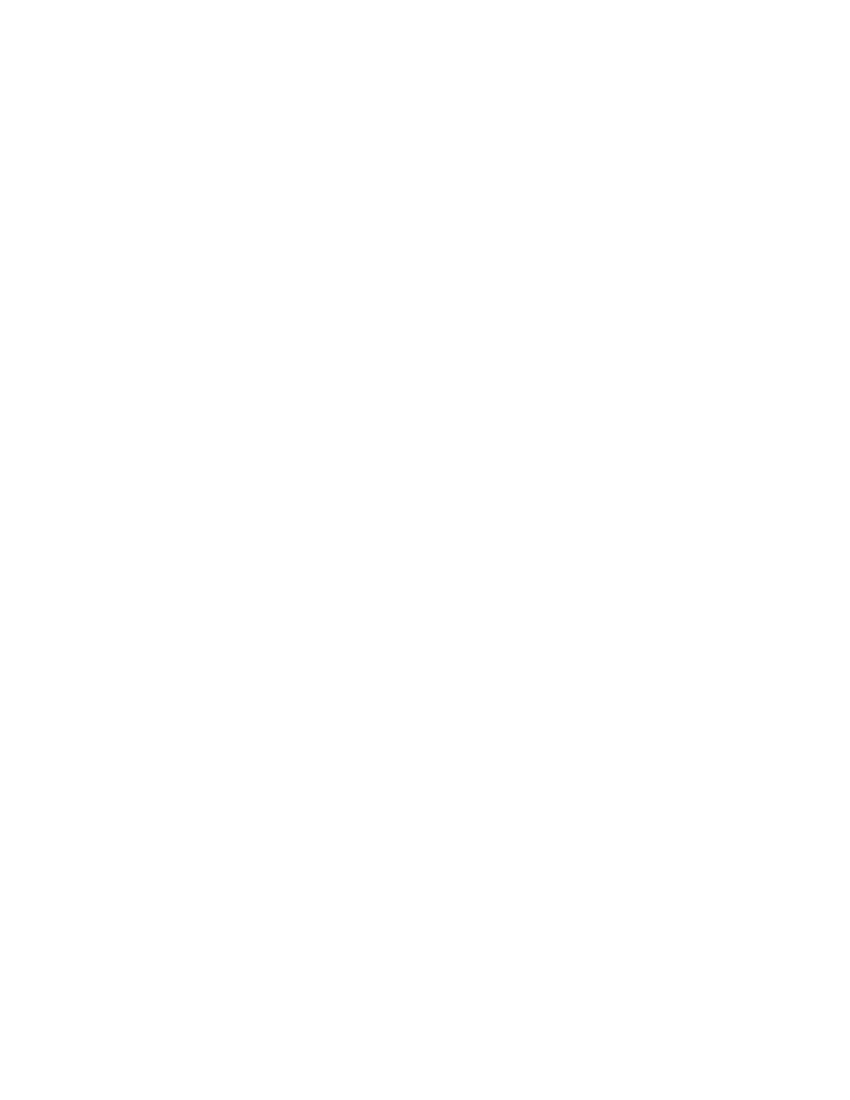

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import subjects
from subjects import sns_boxplot_kw,stat_kw
import pandas as pd
import seaborn as sns
from neuropy.plotting import Fig
from scipy import stats
from statannotations.Annotator import Annotator


grpdata = subjects.GroupData()
group = ['NSD','SD']

# ripple
psd = grpdata.ripple_psd
examples = grpdata.ripple_examples
power= grpdata.ripple_zscore

ripple_autocorr = grpdata.ripple_autocorr
ripple_autocorr = ripple_autocorr[ripple_autocorr.lag_time>=-1]

rate = grpdata.ripple_rate
colors_ripple_rate = subjects.colors_sd(1.3)

total_dur = grpdata.ripple_total_duration
colors_rpl_dur = subjects.colors_sd(1.2)

peak_freq = grpdata.ripple_peak_frequency
peak_freq = peak_freq[(peak_freq['t']!='pre')&(peak_freq["t"]!="maze")]
colors_pf = subjects.colors_sd(1.3)

# pbe

pbe_rate = grpdata.pbe_rate
pbe_total_dur = grpdata.pbe_total_duration

# frate
frate_in_rpl = grpdata.frate_in_ripple
colors_frate = [
    [subjects.nsd.color(0.9), subjects.nsd.color(1.9)],
    [subjects.sd.color(1), subjects.sd.color(1.5)],
]

plt.clf()
fig = Fig(grid=(8, 11), fontsize=7)
filename = subjects.figpath_sd / "figure2"
caption = "Ripple and PBEs compared between SD and NSD sessions.\n(A) Mean ripple power spectral density across SD and NSD sessions during Pre, Maze and POST. Error bars indicate +/- SEM.\n(B) Distribution of peak ripple frequency calculated using wavelet compared across SD (orange) and NSD (purple) at selected epochs of each session. \n(C) Rate of ripple occurence during POST of SD (top left) and NSD (top right) sessions. Black dashed line represent median across sessions. Bottom panel shows integrated ripple duration during POST. \n(D) Same as (C) but of PBE events. \nE) Normalized z-scored firing rate within ripples calculated at various epochs for pyramidal and interneurons. Error bars indicate 90% CI."


### Peak frequency and power

In [7]:
y_labels = ["Intraripple frequency (Hz)", "Ripple power (zscore)"]
for d, (df, y) in enumerate(zip([peak_freq, power], ["f", "zscore"])):
    ax = fig.subplot(fig.gs[0, 2 * d : 2 * d + 2])
    plot_kw = dict(data=df, x="t", y=y, hue="grp", hue_order=group, ax=ax)

    sns.boxplot(**plot_kw, width=0.5, **sns_boxplot_kw)
    ax.tick_params("x", labelrotation=30)
    ax.legend([], frameon=False)
    ax.set_ylabel(y_labels[d])
    ax.set_xlabel("")

    # stats
    orders = df.t.unique()
    pairs = [((_, "NSD"), (_, "SD")) for _ in orders]
    annotator = Annotator(pairs=pairs, **plot_kw, order=orders)
    annotator.configure(test="t-test_welch", **stat_kw)

    annotator.apply_and_annotate()
    annotator.reset_configuration()


### Ripple autocorr
ax = fig.subplot(fig.gs[4])
sns.lineplot(
    data=ripple_autocorr,
    x="lag_time",
    y="auto_corr",
    hue="grp",
    ci=None,
    palette=subjects.colors_sd(1.4),
    lw=1,
)
ax.legend("", frameon=False)
ax.axis("off")


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2.5-5.0_NSD vs. 2.5-5.0_SD: Welch's t-test independent samples, P_val:0.000e+00 t=-9.358e+01
0.0-2.5_NSD vs. 0.0-2.5_SD: Welch's t-test independent samples, P_val:0.000e+00 t=-6.296e+01
5.0-7.5_NSD vs. 5.0-7.5_SD: Welch's t-test independent samples, P_val:1.100e-05 t=-4.397e+00
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2.5-5.0_NSD vs. 2.5-5.0_SD: Welch's t-test independent samples, P_val:0.000e+00 t=4.321e+01
0.0-2.5_NSD vs. 0.0-2.5_SD: Welch's t-test independent samples, P_val:0.000e+00 t=7.039e+01
5.0-7.5_NSD vs. 5.0-7.5_SD: Welch's t-test independent samples, P_val:7.114e-07 t=-4.959e+00


(-2.04, 25.240000000000002, -0.759202034104408, 1.0837715254335432)

### Ripple and PBE rate

In [8]:
y_labels = ["Ripple rate (Hz)", "PBE rate (Hz)"]
for d, (df, y) in enumerate(zip([rate, pbe_rate], ["rate", "rate"])):
    ax = fig.subplot(fig.gs[1, 2 * d : 2 * d + 2])
    plot_kw = dict(
        data=df,
        x="Zt",
        y=y,
        hue="grp",
        hue_order=group,
        ax=ax,
        dodge=True,
    )

    sns.stripplot(
        **plot_kw, palette=subjects.colors_sd(1), edgecolor="k", linewidth=0.3, size=3
    )
    sns.boxplot(**plot_kw, color="k", width=0.5, **sns_boxplot_kw)
    ax.tick_params("x", labelrotation=30)
    ax.legend([], frameon=False)
    ax.set_ylabel(y_labels[d])
    ax.set_xlabel("")

    # stats
    # Across groups
    orders = df.Zt.unique()
    pairs = [((_, "NSD"), (_, "SD")) for _ in orders]
    annotator = Annotator(pairs=pairs, **plot_kw, order=orders)
    annotator.configure(test="t-test_welch", **stat_kw)
    annotator.apply_and_annotate()
    annotator.reset_configuration()

    # Within groups
    pairs2 = []
    for g in group:
        pairs2.extend([((orders[_], g), (orders[_ + 1], g)) for _ in range(2)])
    annotator = Annotator(pairs=pairs2, **plot_kw, order=orders)
    annotator.configure(test="t-test_paired", **stat_kw)
    annotator.apply_and_annotate()
    annotator.reset_configuration()


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2.5-5.0_NSD vs. 2.5-5.0_SD: Welch's t-test independent samples, P_val:1.075e-03 t=-4.110e+00
0.0-2.5_NSD vs. 0.0-2.5_SD: Welch's t-test independent samples, P_val:8.193e-01 t=2.358e-01
5.0-7.5_NSD vs. 5.0-7.5_SD: Welch's t-test independent samples, P_val:6.698e-01 t=-4.397e-01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0-2.5_NSD vs. 2.5-5.0_NSD: t-test paired samples, P_val:1.857e-03 t=4.850e+00
2.5-5.0_NSD vs. 5.0-7.5_NSD: t-test paired samples, P_val:1.169e-01 t=1.788e+00
0.0-2.5_SD vs. 2.5-5.0_SD: t-test paired samples, P_val:7.257e-01 t=-3.652e-01
2.5-5.0_SD vs. 5.0-7.5_SD: t-test paired samples, P_val:1.966e-02 t=3.010e+00
p-value annotation legend:
      ns: p <= 1

### Firing inside/outside ripples

In [9]:
k = 0
for i, w in enumerate(["inside", "outside"]):
    df_w = frate_in_rpl[frate_in_rpl["where"] == w]

    for i1, n in enumerate(["inter", "pyr"]):
        df = df_w[df_w["neuron_type"] == n].reset_index(drop=True)

        ax = plt.subplot(fig.gs[i + 2, 2 * i1 : 2 * i1 + 2])
        plot_kw = dict(data=df, x="time", width=0.5, y="frate", hue="grp", ax=ax)

        sns.boxplot(**plot_kw, **sns_boxplot_kw)
        k = k + 1

        ax.set_ylabel("")
        ax.set_xlabel("")
        ax.legend("", frameon=False)
        ax.tick_params("x", labelrotation=30)

        if i1 == 0:
            ax.set_ylabel(f"Firing rate (z-scored)\n{w} ripples")
            fig.panel_label(ax, "C")

        # stats
        orders = df.time.unique()
        pairs = [((_, "NSD"), (_, "SD")) for _ in orders]
        annotator = Annotator(pairs=pairs, **plot_kw, order=orders)
        annotator.configure(test="t-test_welch", **stat_kw)
        annotator.apply_and_annotate()
        annotator.reset_configuration()


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0-2.5_NSD vs. 0.0-2.5_SD: Welch's t-test independent samples, P_val:6.163e-01 t=-5.027e-01
2.5-5.0_NSD vs. 2.5-5.0_SD: Welch's t-test independent samples, P_val:4.483e-02 t=-2.030e+00
5.0-7.5_NSD vs. 5.0-7.5_SD: Welch's t-test independent samples, P_val:3.730e-02 t=2.108e+00
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.0-2.5_NSD vs. 0.0-2.5_SD: Welch's t-test independent samples, P_val:6.503e-03 t=2.727e+00
2.5-5.0_NSD vs. 2.5-5.0_SD: Welch's t-test independent samples, P_val:4.416e-01 t=7.698e-01
5.0-7.5_NSD vs. 5.0-7.5_SD: Welch's t-test independent samples, P_val:8.904e-04 t=-3.333e+00
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-

### saving

In [ ]:
# fig.savefig(filename,caption=caption)